# Imports

In [2]:
import pandas as pd
import numpy as np

from dash import Dash, html, dcc, no_update
from dash.dependencies import Input, Output, State
import plotly.graph_objects as go
import dash_bootstrap_components as dbc
import plotly.graph_objs as go
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import base64

# Dataset

In [3]:
first=pd.read_csv("data.csv")

In [4]:
first.shape

(1111742, 30)

In [5]:
first.head()

,Unnamed: 0,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,2093518,a3e3cea9f2e314,c9f6eaa81245b5,a3d8693390584c,0,0,25.93,0,0,0,...,0,0.0,0,0.0,0,0,151.30,1,1525,0.0667
1,3701672,43e4be7ad72cc7,521836de101ee8,b65de9055327e0,0,0,36.71,0,0,0,...,0,0.0,0,0.0,0,0,1918.00,7,1516,0.5862
2,2059784,9a68690e31fdff,4a72ffa2cebd90,d6aad3f9830e60,0,1,47.73,0,0,0,...,0,4088.0,0,0.0,0,0,820.00,7,0,0.8105
3,1302036,b147e1bd448fc4,9a8991656b3fea,d931c0932d8aca,0,0,0.00,0,0,0,...,1,0.0,0,0.0,0,0,38.81,0,1515,0.5556
4,297180,d818b4edd59612,eece87c8b846b3,ec2b5ed94baae3,0,2,100.00,0,0,3,...,0,918.4,0,0.0,0,0,1721.00,5,0,0.6429


In [6]:
first = first.dropna(subset=['winPlacePerc'])

In [7]:
first["matchType"].value_counts()

squad-fpp           438781
duo-fpp             249927
squad               156573
solo-fpp            133853
duo                  78039
solo                 45679
normal-squad-fpp      4286
crashfpp              1581
normal-duo-fpp        1400
flaretpp               633
normal-solo-fpp        465
flarefpp               180
normal-squad           135
crashtpp                86
normal-solo             75
normal-duo              48
Name: matchType, dtype: int64

In [8]:
do=first.copy()
do.head()

,Unnamed: 0,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,2093518,a3e3cea9f2e314,c9f6eaa81245b5,a3d8693390584c,0,0,25.93,0,0,0,...,0,0.0,0,0.0,0,0,151.30,1,1525,0.0667
1,3701672,43e4be7ad72cc7,521836de101ee8,b65de9055327e0,0,0,36.71,0,0,0,...,0,0.0,0,0.0,0,0,1918.00,7,1516,0.5862
2,2059784,9a68690e31fdff,4a72ffa2cebd90,d6aad3f9830e60,0,1,47.73,0,0,0,...,0,4088.0,0,0.0,0,0,820.00,7,0,0.8105
3,1302036,b147e1bd448fc4,9a8991656b3fea,d931c0932d8aca,0,0,0.00,0,0,0,...,1,0.0,0,0.0,0,0,38.81,0,1515,0.5556
4,297180,d818b4edd59612,eece87c8b846b3,ec2b5ed94baae3,0,2,100.00,0,0,3,...,0,918.4,0,0.0,0,0,1721.00,5,0,0.6429


In [9]:
labelencoder = LabelEncoder()

In [10]:
do['matchType'] = do['matchType'].apply(lambda x: 'solo' if ('solo' in x) else 'duo' if ('duo' in x) or ('crash' in x) else 'squad')
do['matchType'] = labelencoder.fit_transform(do['matchType'])
do['matchType'].value_counts()

2    600588
0    331081
1    180072
Name: matchType, dtype: int64

In [11]:
img_src = 'assets\cover.jpg'

In [12]:
do = do.dropna(subset=['winPlacePerc'])

In [13]:
do = first.sample(frac=0.1, random_state=42)

# DataSet After EAD

In [14]:
distances = pd.read_csv('kill_match sample.csv')
distances

,weapon_name,killer_name,killer_placement,killer_position_x,killer_position_y,map,match_id,time,victim_name,victim_placement,victim_position_x,victim_position_y,kill_distance,weapon_prop
0,UMP9,Tarenwebber,21.0,654680.4,353927.5,ERANGEL,2U4GBNA0YmnOxvw8XSLaYXzT7LMEApzWlwlTz6ZvStSP0u...,361,TheZombieMaker,59.0,655614.4,354382.8,1039.0,0.065300
1,AKM,BrennDizz,1.0,461021.7,428147.0,ERANGEL,2U4GBNA0YmlKcbejOEnt_Fb2zmz_LCYVf9gaoSOfcx6wIX...,1844,xhjinwanchiji666,2.0,457733.6,433521.9,6301.0,0.096008
2,Down and Out,CLOSED11,7.0,428845.4,506403.6,MIRAMAR,2U4GBNA0YmlXa3vLKlwUGPu6g6PjBh2Cr_tM-0aZYh9a4i...,971,CLOSED11,7.0,428845.4,506403.6,0.0,0.160407
3,M416,TPFANG19,7.0,418015.5,384164.9,ERANGEL,2U4GBNA0Ymlk9iPds87_fS9wr-PQqyzK3uQtUcqJ-ZXbRp...,1394,feelbucuo,10.0,418428.8,384888.6,833.0,0.126019
4,P92,ZHANG7115,11.0,451274.9,629562.6,ERANGEL,2U4GBNA0YmnZMF8kCJmMEGwimi55UOAYwuGNZuByim1xVC...,167,CCCCChiJi0924,78.0,450893.0,629335.6,444.0,0.012584
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107590,M416,liubkaini,2.0,444761.8,689122.6,MIRAMAR,2U4GBNA0YmmYf5mGPSJNjuNJ_5cO6CDDq36p98nBm3u-np...,904,Megalodon420,13.0,442874.0,691653.6,3157.0,0.126019
107591,S686,yueyuyongbudese,5.0,182003.1,230121.2,MIRAMAR,2U4GBNA0YmkIGT8FOYti7zeD6pQTAupf2_hWmWC4EYUDBy...,1465,PLAMaSir,6.0,182010.7,229280.9,840.0,0.029862
107592,Motorbike,LLLLLLqh,11.0,480044.2,298243.0,MIRAMAR,2U4GBNA0YmlT3je1svBHylesVyBZoXNks2OUNAgN5Q4Nv3...,972,Javierguzman95,16.0,482294.9,301982.8,4365.0,0.000771
107593,S1897,ColonelKetchum,1.0,186547.9,522424.2,ERANGEL,2U4GBNA0YmmRSHOTsoER2PQ6DtrJM_9IyCeKjhZUetYYPf...,381,laodasdda,32.0,186773.8,523781.3,1376.0,0.051880


In [15]:
#First Graph
do['matchType'] = do['matchType'].apply(lambda x: 'solo' if ('solo' in x) else 'duo' if ('duo' in x) or ('crash' in x) else 'squad')

do['matchType'] = labelencoder.fit_transform(do['matchType'])
do['matchType'].value_counts()

map_dict = {0: 'duo', 1: 'solo', 2: 'squad'}
do['matchType'] = do['matchType'].replace(map_dict)
color_map = {'solo': 'red', 'duo': 'blue', 'squad': 'green'}

fig = px.histogram(do, x="matchType",color_discrete_map=color_map, category_orders=dict(matchType=["solo", "duo", "squad"]), histnorm='percent')
fig.update_xaxes(title_text='Match Mode')
fig.update_yaxes(title_text='Win Percent')
fig.update_layout(title={
        'text': 'Match Mode',
        'x': 0.5,
        'y': 0.95,
        'xanchor': 'center',
        'yanchor': 'top'
    },)
fig.update_layout(bargap=0.2,template='plotly_dark')

In [16]:
#Fivth Graph
names = ['rideDistance', 'swimDistance', 'walkDistance']
size = [do['rideDistance'].sum(), do['swimDistance'].sum()*10, do['walkDistance'].sum()]

layout = go.Layout(
    title='Total Distance Travelled',
)

trace = go.Pie(
    labels=names,
    values=size,
    hole=0.7,
)

fig2 = go.Figure(data=[trace], layout=layout)
fig2.update_layout(bargap=0.2,template='plotly_dark')

In [17]:
#ٍSixth Graph
players = do['matchType'].value_counts()

labels = ['Duo', 'Solo', 'Squad']
values = [players[0], players[1], players[2]]

fig3 = go.Figure(data=[go.Pie(labels=labels, values=values)])

fig3.update_layout(title='Number of Players by Match Type', bargap=0.2,template='plotly_dark')

7357
7644


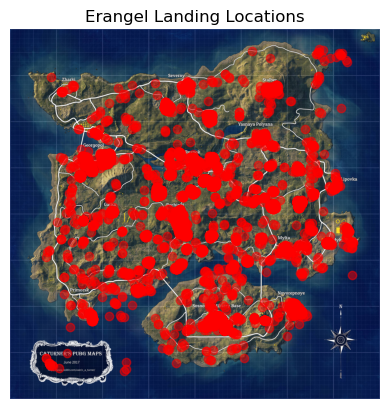

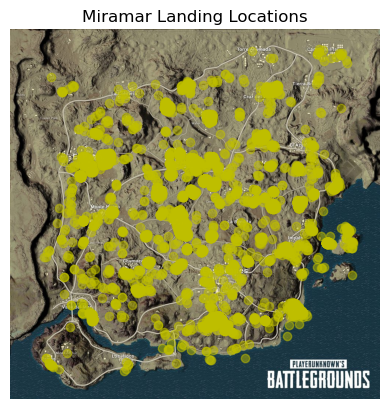

117
117
7357
7644
112
19


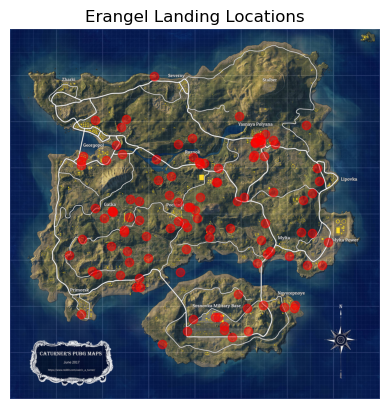

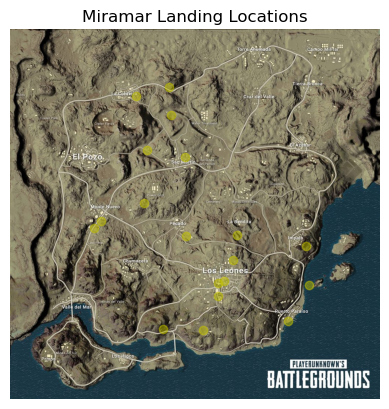

In [ ]:
# death=distances.copy()

# era_landing = death[death['time'] <= 121]
# mir_landing = death[death['time'] <= 122]
# era_landing.iloc[:, [3, 4, 10, 11]] = era_landing.iloc[:, [3, 4, 10, 11]] * 4096 / 800000
# mir_landing.iloc[:, [3, 4, 10, 11]] = mir_landing.iloc[:, [3, 4, 10, 11]] * 1000 / 800000

# from PIL import Image
# import numpy as np
# erangel_map = np.array(Image.open("erangel.jpg"))
# miramar_map = np.array(Image.open("miramar.jpg"))

# print(era_landing.shape[0])
# print(mir_landing.shape[0])

# # Plot the Erangel map
# fig, ax = plt.subplots()
# ax.imshow(erangel_map)
# ax.set_axis_off()

# # Plot the landing locations
# ax.scatter(era_landing['killer_position_x'], era_landing['killer_position_y'], c='r', marker='o', alpha=0.5)

# # Add a title
# ax.set_title('Erangel Landing Locations')
# plt.savefig("ErangelScatter.png")

# with open("ErangelScatter.png", "rb") as image_file:
#     encoded_image1 = base64.b64encode(image_file.read()).decode()

# # Show the plot
# plt.show()

# # Plot the Miramar map
# fig, ax = plt.subplots()
# ax.imshow(miramar_map)
# ax.set_axis_off()

# # Plot the landing locations
# ax.scatter(mir_landing['killer_position_x'], mir_landing['killer_position_y'], c='y', marker='o', alpha=0.5)

# # Add a title
# ax.set_title('Miramar Landing Locations')
# plt.savefig("MiramarlScatter.png")
# with open("MiramarlScatter.png", "rb") as image_file:
#     encoded_image2 = base64.b64encode(image_file.read()).decode()

# # Show the plot
# plt.show()

# era_time = max(death['time']) - 195
# mir_time = max(death['time']) - 195
# era_final = death[death['time'] >= era_time]
# mir_final = death[death['time'] >= mir_time]
# print(era_final.shape[0])
# print(mir_final.shape[0])


# from PIL import Image
# import numpy as np
# erangel_map = np.array(Image.open("erangel.jpg"))
# miramar_map = np.array(Image.open("miramar.jpg"))

# print(era_landing.shape[0])
# print(mir_landing.shape[0])



# import numpy as np

# np.random.seed(100615)

# data2_new = death
# data2_new = data2_new.dropna()
# data2_new = data2_new[data2_new['map'] != '']

# era_final_new = data2_new[data2_new['map'] == 'ERANGEL']
# mir_final_new = data2_new[data2_new['map'] == 'MIRAMAR']

# time1 = max(era_final_new['time']) - 195
# time2 = max(mir_final_new['time']) - 195
# era_final_new = era_final_new[era_final_new['time'] >= time1]
# mir_final_new = mir_final_new[mir_final_new['time'] >= time2]

# era_final_new.iloc[:,[3, 4, 10, 11]] = era_final_new.iloc[:,[3, 4, 10, 11]] * 4096 / 800000
# mir_final_new.iloc[:,[3, 4, 10, 11]] = mir_final_new.iloc[:,[3, 4, 10, 11]] * 1000 / 800000

# print(era_final_new.shape[0])
# print(mir_final_new.shape[0])


# # Plot the Erangel map
# fig, ax = plt.subplots()
# ax.imshow(erangel_map)
# ax.set_axis_off()

# # Plot the landing locations
# ax.scatter(era_final_new['killer_position_x'], era_final_new['killer_position_y'], c='r', marker='o', alpha=0.5)

# # Add a title
# ax.set_title('Erangel Landing Locations')

# # Show the plot
# plt.show()

# # Plot the Miramar map
# fig, ax = plt.subplots()
# ax.imshow(miramar_map)
# ax.set_axis_off()

# # Plot the landing locations
# ax.scatter(mir_final_new['killer_position_x'], mir_final_new['killer_position_y'], c='y', marker='o', alpha=0.5)

# # Add a title
# ax.set_title('Miramar Landing Locations')

# # Show the plot
# plt.show()



# Dashboard

### Cards

In [19]:
card_Kills = dbc.Card(
    dbc.CardBody(
        [
            dbc.CardHeader("weapon Numbers", className="card-title", style={"font-weight": "bold", 'font-size':'15px', 'height':'40px', 'padding':'0.1rem', 'color':'white',
                                 }),
            dbc.CardFooter(
                len(distances['weapon_name'].unique()),
                id='Kills-card',
                className="card-text",
                style={'padding':'0.1rem', 'color': 'white', 'font-size':'35px', 'height':'70px'}
            ),
        ], style={'padding':'9px'}
    ),
    style={"width": "11rem", 'height':'8rem', 'textAlign': 'center', 'border-radius':'6px', 
    'box-shadow':' lightblue 1px 0px 6px 0.2px', 'margin':'0px'}, 
    
)

card_Boost = dbc.Card(
    dbc.CardBody(
        [
            dbc.CardHeader("Total Players", className="card-title", 
            style={"font-weight": "bold", 'font-size':'15px', 'height':'40px', 'padding':'0.1rem','color':'white',}),
            dbc.CardFooter(
                np.sum(do['matchType'].value_counts()),
                id='Boost-card',
                className="card-text",
                style={'padding':'0.1rem','color': 'white', 'font-size':'35px', 'height':'70px'} 
            ),
        ], style={'padding':'9px'}
    ),
    style={"width": "11rem", 'height':'8rem', 'textAlign': 'center', 'border-radius':'6px', 
    'box-shadow':' lightblue 1px 0px 6px 0.2px','margin':'0px'} 
    
)

card_Heals = dbc.Card(
    dbc.CardBody(
        [
            dbc.CardHeader("Max Walk Distance", className="card-title", style={"font-weight": "bold", 'font-size':'15px', 'height':'40px', 'padding':'0.1rem','color':'white'
                            , }),
            dbc.CardFooter(
                str(max(do['walkDistance']) / 1000) + " KM",
                id='Heals-card',
                className="card-text",
                style={'padding':'0.1rem', 'color': 'white', 'font-size':'35px', 'height':'70px'}
            ),
        ], style={'padding':'9px'}
    ),
   style={"width": "11rem", 'height':'8rem', 'textAlign': 'center', 'border-radius':'6px', 
   'box-shadow':' lightblue 1px 0px 6px 0.2px','margin':'0px'}, 
                 
)

card_Distance = dbc.Card(
    dbc.CardBody(
        [
            dbc.CardHeader("Max Kills in a Match", className="card-title", style={"font-weight": "bold", 'font-size':'15px', 'height':'40px', 'padding':'0.1rem', 'color':'white'
                        , },),
            dbc.CardFooter(do['kills'].max(),
                id='Distance-card',
                className="card-text",
                style={'padding':'0.1rem', 'color': 'white', 'font-size':'35px', 'height':'70px'}
            ),
        ], style={'padding':'9px'}
    ),
   style={"width": "11rem", 'height':'8rem', 'textAlign': 'center', 'border-radius':'6px', 
   'box-shadow':' lightblue 1px 0px 6px 0.2px' ,'margin':'0px', },
                
)

### Graphs

In [20]:
app = Dash(__name__, external_stylesheets=[dbc.themes.DARKLY], title='Pubg')
server = app.server
server.static_folder='assets'
app.layout = dbc.Container([
    html.Br(),
    dbc.Row(html.Img(src=img_src,style={'border-radius':'2%', 'height':'500px','width':'80%','align-items':'center', 'margin':'auto',}),style={'align-items': 'center',}),
    dbc.Row([
                    dbc.Col([card_Kills],),
                    dbc.Col([card_Boost],),
                    dbc.Col([card_Heals],),
                    dbc.Col([card_Distance],),
                ],style={'margin': 'auto', 'padding': '20px 100px', 'width': '80%',},),
    
    dbc.Row([
                    dbc.Col([         
                            dbc.Row(html.Div([],style={'height': '5px', 'margin-top': '15px',})),

                            dbc.Row([
                                        html.Br(),
                                        html.Br(),
                                        html.Div(children=[dbc.Col(

                                        ),

                                        dcc.Graph(figure=fig, clear_on_unhover=True, style={'margin':'auto', 'padding':' 46px 10px'}),
                                        dcc.Tooltip(id="scatter-graph-tooltip"),
                                        ], style={'box-shadow':' lightblue 0px 1px 6px 0.2px'}),
                                        ], style={'width': '100%',}),    
                                        
                    
                    ], style={'textAlign': 'center', 'padding': '10px', 'width': '45%',},),

                    dbc.Col([         
                            dbc.Row(html.Div([],style={'height': '5px', 'margin-top': '15px',})),

                           dbc.Row([
                                        html.Div(children=[dbc.Col(dcc.RangeSlider(
                                        id='range-slider',
                                        min=0,
                                        max=max(list(distances["time"])),
                                        step=200,
                                        value=[600, 800],
                                        marks={i: str(i) for i in range(0, max(list(distances["time"])), 200)},
                                        ),
                                        style={'width': '600px', 'text-align': 'center',
                                            'margin': 'auto', 'padding': '15px',}
                                        ),

                                        dcc.Graph(id='range-fig', clear_on_unhover=True, style={'margin':'auto', 'padding':'10px'}),
                                        dcc.Tooltip(id="scatter-graph-tooltip7"),
                                        ], style={'box-shadow':' lightblue 0px 1px 6px 0.2px'}),
                                        ], style={'width': '100%',}),  
                    
                    ], style={'textAlign': 'center', 'padding': '10px' ,'width': '100%'},)

                    
            ], style={'width': '80%','padding': '20px' , 'margin': 'auto'},),

    
    dbc.Row([
                    dbc.Col([         
                            dbc.Row(html.Div([],style={'height': '5px', 'margin-top': '15px',})),

                            dbc.Row([
                                        html.Div(children=[dbc.Col(dcc.Dropdown(['very short distance','short distance','medium distance','large distance'],
                                        id='scatter-x-dropdown2',
                                        multi=False,
                                        value='very short distance',
                                        placeholder='choose distance',
                                        style={'background': 'black', 'color': 'black !important'}
                                        
                                        ),
                                        style={'width': '300px', 'text-align': 'center',
                                            'margin': 'auto', 'padding': '15px', } 
                                        ),

                                        dcc.Graph(id='scatter-graph2', clear_on_unhover=True, style={'margin-right':'40px', 'padding':'10px'}),
                                        dcc.Tooltip(id="scatter-graph-tooltip2"),
                                        ], style={'box-shadow':' lightblue 0px 1px 6px 0.2px'}),
                                        ], style={'width': '100%',}),    
                                        
                    
                    ], style={'textAlign': 'center', 'padding': '10px', 'width': '45%',},),

            ], style={'width': '80%','padding': '20px' , 'margin': 'auto'},),

   dbc.Row([
                    dbc.Col([         
                            dbc.Row(html.Div([],style={'height': '5px', 'margin-top': '15px',})),

                            dbc.Row([
                                        html.Div(children=[dbc.Col(dcc.Dropdown(
                                                                id='heals-boosts-slider',
                                                                options=[
                                                                {'label': 'solo', 'value': 'solo'},
                                                                {'label': 'duo', 'value': 'duo'},
                                                                {'label': 'squad', 'value': 'squad'},
                                                                ],
                                                                value=['solo'],
                                                                multi=True,
                                                                placeholder='choose Type of team',
                                                        ),),
                                                           

                                        dcc.RadioItems(id='heals-boosts-radio-items',
                                        options=[
                                        {'label': 'Heals', 'value': 'heals'},
                                        {'label': 'Boosts', 'value': 'boosts'}
                                        ],
                                        value='heals',
                                        labelStyle={'display': 'inline-block', 'padding': '10px'}),
    
                                        dcc.Graph(id='heals-boosts-fig', clear_on_unhover=True, style={'margin-right':'40px', 'padding':'10px'}),
                                        dcc.Tooltip(id="scatter-graph-tooltip8"),
                                        ], style={'box-shadow':' lightblue 0px 1px 6px 0.2px'}),
                                        ], style={'width': '100%',}),    
                                        
                    
                    ], style={'textAlign': 'center', 'padding': '10px', 'width': '45%',},),

            ], style={'width': '80%','padding': '20px' , 'margin': 'auto'},),

            


    dbc.Row([
                    dbc.Col([         
                            dbc.Row(html.Div([],style={'height': '5px', 'padding': '20px 100px', 'margin-top': '15px',})),

                            dbc.Row([
                                        html.Br(),
                                        html.Br(),
                                        html.Div(children=[dbc.Col(
    

                                        ),

                                        dcc.Graph(figure=fig2, clear_on_unhover=True, style={'margin':'auto', 'padding':' 46px 10px'}),
                                        dcc.Tooltip(id="scatter-graph-tooltip10"),
                                        ], style={'box-shadow':' lightblue 0px 1px 6px 0.2px'}),
                                        ], style={'width': '100%',}), 
                                        
                    
                    ], style={'textAlign': 'center', 'padding': '10px', 'width': '45%',},),

                    dbc.Col([         
                            dbc.Row(html.Div([],style={'height': '5px','padding': '20px 100px', 'margin-top': '15px',})),

                           dbc.Row([
                                        html.Br(),
                                        html.Br(),
                                        html.Div(children=[dbc.Col(

                                        ),

                                        dcc.Graph(figure=fig3, clear_on_unhover=True, style={'margin':'auto', 'padding':' 46px 10px'}),
                                        dcc.Tooltip(id="scatter-graph-tooltip11"),
                                        ], style={'box-shadow':' lightblue 0px 1px 6px 0.2px'}),
                                        ], style={'width': '100%',}),
                    
                    ], style={'textAlign': 'center', 'padding': '10px' ,'width': '100%'},)

                    
            ], style={'width': '80%','padding': '20px' , 'margin': 'auto'},),

   

    #---------------------------------------------------------------------------------------------------------------

    dbc.Row(style={'height': '0px', 'margin': '0px', 'padding': '0px'}),], fluid=True,)


### Events (callback)

In [21]:
sample = do.copy()

In [22]:
#Second Graph
@app.callback(
    Output(component_id='range-fig', component_property='figure'),
    Input(component_id='range-slider', component_property='value'),
)

def fig2(range_selection):
    min_time = range_selection[0]
    max_time = range_selection[1]
    time_range = distances[(distances["time"] >= min_time) & (distances["time"] <= max_time)]
    grouped_time = time_range.groupby("weapon_name").size().sort_values(ascending = False)
    top_10 = grouped_time.head(10)
    deaths = sum(list(grouped_time.values))
    
    fig = go.Figure(data=[go.Bar(y=top_10.index.values, x=top_10.values,orientation='h')])
    fig.update_layout(title=f"Top 10 Weapons ({min_time} to {max_time} sec.); {deaths} Total Deaths",
                      yaxis=dict(autorange="reversed") , yaxis_tickformat = '.2f%', template='plotly_dark')
    return fig


#Third Graph
@app.callback(
    Output(component_id='scatter-graph2', component_property='figure'),
    Input('scatter-x-dropdown2', 'value'),
)
def fig3(dropdown_x_y_value):
    if dropdown_x_y_value == 'very short distance':
        lower_quantile = np.quantile(distances["kill_distance"], 0)
        upper_quantile = np.quantile(distances["kill_distance"], 0.05)
        distances2 = distances[(distances["kill_distance"] >= lower_quantile) & (distances["kill_distance"] <= upper_quantile)]
        weapon_counts = distances2["weapon_name"].value_counts(normalize=True) * 100
        weapon_perc_df = pd.DataFrame({'Weapon Name': weapon_counts.index, 'Percentage': weapon_counts.values})
        fig = px.bar(weapon_perc_df, x='Weapon Name', y='Percentage', title=f"Weapon Counts ({0} to {0.05} Percentile)")
    
    elif dropdown_x_y_value == 'short distance':
        lower_quantile = np.quantile(distances["kill_distance"], 0.05)
        upper_quantile = np.quantile(distances["kill_distance"], 0.25)
        distances2 = distances[(distances["kill_distance"] >= lower_quantile) & (distances["kill_distance"] <= upper_quantile)]
        weapon_counts = distances2["weapon_name"].value_counts(normalize=True) * 100
        weapon_perc_df = pd.DataFrame({'Weapon Name': weapon_counts.index, 'Percentage': weapon_counts.values})
        fig = px.bar(weapon_perc_df, x='Weapon Name', y='Percentage', title=f"Weapon Counts ({0.05} to {0.25} Percentile)")
    
    elif dropdown_x_y_value == 'medium distance':
        lower_quantile = np.quantile(distances["kill_distance"], 0.25)
        upper_quantile = np.quantile(distances["kill_distance"], 0.75)
        distances2 = distances[(distances["kill_distance"] >= lower_quantile) & (distances["kill_distance"] <= upper_quantile)]
        weapon_counts = distances2["weapon_name"].value_counts(normalize=True) * 100
        weapon_perc_df = pd.DataFrame({'Weapon Name': weapon_counts.index, 'Percentage': weapon_counts.values})
        fig = px.bar(weapon_perc_df, x='Weapon Name', y='Percentage', title=f"Weapon Counts ({0.25} to {0.75} Percentile)")
        
    elif dropdown_x_y_value == 'large distance':
        lower_quantile = np.quantile(distances["kill_distance"], 0.75)
        upper_quantile = np.quantile(distances["kill_distance"], 1)
        distances2 = distances[(distances["kill_distance"] >= lower_quantile) & (distances["kill_distance"] <= upper_quantile)]
        weapon_counts = distances2["weapon_name"].value_counts(normalize=True) * 100
        weapon_perc_df = pd.DataFrame({'Weapon Name': weapon_counts.index, 'Percentage': weapon_counts.values})
        fig = px.bar(weapon_perc_df, x='Weapon Name', y='Percentage', title=f"Weapon Counts ({0.75} to {1} Percentile)")
    fig.update_xaxes(title_text='Weapon Name')
    fig.update_yaxes(title_text='Win Percent')
    fig.update_layout(title={
        'text': 'Weapons',
        'x': 0.5,
        'y': 0.95,
        'xanchor': 'center',
        'yanchor': 'top'
    },)
    fig.update_layout(yaxis_tickformat = '.2f%', template='plotly_dark')
    return fig    

#Forth Graph
@app.callback(
    Output(component_id='heals-boosts-fig', component_property='figure'),
    Input(component_id='heals-boosts-slider', component_property='value'),
    Input(component_id='heals-boosts-radio-items', component_property='value'),
)
def fig4(gen_selection, radio_selection):
    if radio_selection == None:
        radio_selection = 'heals'
    match_types = gen_selection
    fig = go.Figure()
    data = do.copy()    

    if(radio_selection == "heals"):
        for match_type in match_types:
            subset_data = data[data['matchType'] == match_type].groupby('heals', as_index=False)['winPlacePerc', 'kills', 'killStreaks', 'headshotKills'].mean()
            fig.add_trace(go.Scatter(x=subset_data['heals'], y=subset_data['winPlacePerc'], name=match_type))
    else:
        for match_type in match_types:
            subset_data = data[data['matchType'] == match_type].groupby('boosts', as_index=False)['winPlacePerc', 'kills', 'killStreaks', 'headshotKills'].mean()
            fig.add_trace(go.Scatter(x=subset_data['boosts'], y=subset_data['winPlacePerc'], name=match_type))
    fig.update_layout(yaxis_tickformat = '.2f%', template='plotly_dark')
    return fig

### Run Server

In [23]:
app.run_server()

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:8050
Press CTRL+C to quit
127.0.0.1 - - [03/Apr/2023 09:04:46] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [03/Apr/2023 09:04:47] "GET /_dash-dependencies HTTP/1.1" 200 -


Exception on /_dash-layout [GET]
Traceback (most recent call last):
  File "c:\ProgramData\Anaconda3\envs\ITIAi\lib\site-packages\flask\app.py", line 2525, in wsgi_app
    response = self.full_dispatch_request()
  File "c:\ProgramData\Anaconda3\envs\ITIAi\lib\site-packages\flask\app.py", line 1822, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "c:\ProgramData\Anaconda3\envs\ITIAi\lib\site-packages\flask\app.py", line 1820, in full_dispatch_request
    rv = self.dispatch_request()
  File "c:\ProgramData\Anaconda3\envs\ITIAi\lib\site-packages\flask\app.py", line 1796, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint])(**view_args)
  File "c:\ProgramData\Anaconda3\envs\ITIAi\lib\site-packages\dash\dash.py", line 659, in serve_layout
    to_json(layout),
  File "c:\ProgramData\Anaconda3\envs\ITIAi\lib\site-packages\dash\_utils.py", line 22, in to_json
    return to_json_plotly(value)
  File "c:\ProgramData\Anaconda3\envs\ITIAi\lib\s

127.0.0.1 - - [03/Apr/2023 09:04:47] "GET /_dash-layout HTTP/1.1" 500 -
127.0.0.1 - - [03/Apr/2023 09:04:47] "GET /_favicon.ico?v=2.8.1 HTTP/1.1" 200 -
